# **Predicción de homicidios por municipio**

### **Librerias para generación y visualización del dataset**

In [1]:
# Importando librerias necesarias para la creación del dataset
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#Accede a Google Drive para importar los datos, los cuales provienen de una recopilación de bases de datos de indices de criminalidad en el triangulo norte
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **1. Recopilación de datos**
Los datos han sido extraidos de un archivo CSV recuperados de una [recopilación de Bases de Datos sobre indicadores de criminalidad y justicia en el triángulo norte](https://www.aas.jjay.cuny.edu/single-post/base-de-datos?fbclid=IwAR3Itx49fRZJoazPUPWYLpASA3bag7UjRUCzey4pvtec5O9mjdwG9QLboUE), a la cual se puede acceder en el enlace.

**Referencia**: Academy for Security Analysis, John Jay College of Criminal Justice. (2020). *Recopilación de Bases de Datos sobre indicadores de criminalidad y justicia en El Salvador, Guatemala y Honduras*.

Por ser información pública también ha sido anexado para facilitar su consulta.

In [3]:
#Importando datos de CSV
#Referencia: Academy for Security Analysis, John Jay College of Criminal Justice. (2020). Recopilación de Bases de Datos sobre indicadores de criminalidad y justicia en El Salvador, Guatemala y Honduras.
df = pd.read_csv("drive/My Drive/IMLHom.csv")
print(len(df))
df.head()

44208


,NoTotal,Año,N,Mes,Fecha,Fecha_Completa,Dia,Hora,Rango_Horario,Sexo,Edad,Rango_Edad,Municipio,Departamento,Clasificacion_Arma,Tipo_Arma,Codigo_Departamento,Codigo_Municipio
0,1,2008,1,1,02/01,1/2/2008,Miercoles,1250,4,M,33,4,TACUBA,AHUACHAPAN,4,ASF X ESTRANGULACION,1,111
1,2,2008,2,1,02/01,1/2/2008,Miercoles,1900,5,M,43,5,CHALCHUAPA,SANTA ANA,5,OBJETO CONTUNDENTE,2,203
2,3,2008,3,1,02/01,1/2/2008,Miercoles,420,2,M,40,4,SANTA ANA,SANTA ANA,5,OBJETO CONTUNDENTE,2,210
3,4,2008,4,1,02/01,1/2/2008,Miercoles,550,2,M,24,3,CHALCHUAPA,SANTA ANA,2,BLANCA SIN ESPEC.,2,203
4,5,2008,5,1,02/01,1/2/2008,Miercoles,600,2,M,36,4,YUCUAIQUIN,LA UNION,2,CORTOCONTUNDENTE,14,1418


## **2. Limpieza de datos**
Se procede a eliminar las columnas de dataset que son innecesarias para el modelo, así como a modificar los tipos de datos del mismo.
También se calcula el total de homicidios por año en cada municipio y se agrega esa nueva columna al dataset y finalmente se categorizan los nombres de los municipios.

In [4]:
#Modifica el df a solo homicidios con los 4 tipos de armas que tenian más registros: ARMA DE FUEGO o ASF X ESTRANGULACION o OBJETO CONTUNDENTE o CORTOCONTUNDENTE
df = df[df.Tipo_Arma.str.contains('ARMA DE FUEGO|ASF X ESTRANGULACION|OBJETO CONTUNDENTE|CORTOCONTUNDENTE', regex=True)]
print(len(df))

40483


In [5]:
#Eliminamos las columnas innecesarias
df = df.drop(['NoTotal', 'N', 'Mes', 'Fecha', 'Fecha_Completa', 'Dia','Hora', 'Rango_Horario', 'Departamento', 'Codigo_Departamento', 'Codigo_Municipio', 'Rango_Edad', 'Clasificacion_Arma', 'Edad', 'Sexo', 'Tipo_Arma'], axis=1)
df.head()

,Año,Municipio
0,2008,TACUBA
1,2008,CHALCHUAPA
2,2008,SANTA ANA
4,2008,YUCUAIQUIN
5,2008,TONACATEPEQUE


In [6]:
#Parseamos los tipos de datos
df = df.convert_dtypes()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40483 entries, 0 to 44207
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Año        40483 non-null  Int64 
 1   Municipio  40483 non-null  string
dtypes: Int64(1), string(1)
memory usage: 988.4 KB


In [7]:
#Creamos una copia d la columna año para hacer el count()
df["AñoAux"] = df["Año"]

In [8]:
#Guardamos el df agrupado para luego asignar los totales a cada fila del df
df_g = df.groupby(['Municipio', 'Año']).count()

In [9]:
#Creamos la columna de total y la asignamos al df
totalArray = []
for municipio, año in zip(df["Municipio"], df["Año"]):
  totalArray.append(df_g.loc[municipio,año].AñoAux)

totalValues = pd.Series(totalArray)
df['Total'] = totalValues.values
df.head()

,Año,Municipio,AñoAux,Total
0,2008,TACUBA,2008,10
1,2008,CHALCHUAPA,2008,57
2,2008,SANTA ANA,2008,176
4,2008,YUCUAIQUIN,2008,1
5,2008,TONACATEPEQUE,2008,49


In [10]:
#Elimina la columna auxiliar
df.drop(['AñoAux'], axis = 1, inplace=True)
df.head()

,Año,Municipio,Total
0,2008,TACUBA,10
1,2008,CHALCHUAPA,57
2,2008,SANTA ANA,176
4,2008,YUCUAIQUIN,1
5,2008,TONACATEPEQUE,49


In [11]:
#Covierte la columna municipio a tipo categoria
df["Municipio"] = df["Municipio"].astype('category')
df.dtypes

Año             Int64
Municipio    category
Total           int64
dtype: object

In [12]:
#Mapea el df asignando el codigo a los municipios que le corresponde
df["Municipio_encode"] = df["Municipio"].cat.codes
df.head(25)

,Año,Municipio,Total,Municipio_encode
0,2008,TACUBA,10,229
1,2008,CHALCHUAPA,57,25
2,2008,SANTA ANA,176,201
4,2008,YUCUAIQUIN,1,252
5,2008,TONACATEPEQUE,49,242
6,2008,SAN LUIS LA HERRADURA,2,178
8,2008,SAN MARTIN,54,181
10,2008,SAN SALVADOR,217,196
11,2008,SAN SALVADOR,217,196
12,2008,QUEZALTEPEQUE,80,133


In [13]:
#Crea un diccionario donde relaciona los codigos de la categorias con el nombre del municipio
municipiosDict = dict(zip(df['Municipio'].cat.codes, df['Municipio']))
print(municipiosDict)

{229: 'TACUBA', 25: 'CHALCHUAPA', 201: 'SANTA ANA', 252: 'YUCUAIQUIN', 242: 'TONACATEPEQUE', 178: 'SAN LUIS LA HERRADURA', 181: 'SAN MARTIN', 196: 'SAN SALVADOR', 133: 'QUEZALTEPEQUE', 149: 'SAN CRISTOBAL', 183: 'SAN MIGUEL', 33: 'CIUDAD ARCE', 75: 'ILOBASCO', 108: 'MONCAGUA', 225: 'SONSONATE', 35: 'CIUDAD DELGADO', 180: 'SAN MARCOS', 134: 'ROSARIO DE MORA', 171: 'SAN JUAN OPICO', 87: 'JUCUAPA', 0: 'ACAJUTLA', 150: 'SAN DIONISIO', 36: 'COATEPEQUE', 110: 'NAHUILINGO', 9: 'APOPA', 103: 'MEJICANOS', 38: 'COLON', 246: 'USULUTAN', 47: 'CORINTO', 49: 'CUSCATANCINGO', 74: 'HUIZUCAR', 254: 'ZARAGOZA', 76: 'ILOPANGO', 227: 'SOYAPANGO', 198: 'SAN SEBASTIAN SALITRILLO', 12: 'ARMENIA', 112: 'NEJAPA', 135: 'SACACOYO', 6: 'ANTIGUO CUSCATLAN', 238: 'TEOTEPEQUE', 2: 'AGUILARES', 234: 'TECOLUCA', 37: 'COJUTEPEQUE', 189: 'SAN PEDRO PERULAPAN', 4: 'ALEGRIA', 78: 'IZALCO', 186: 'SAN PABLO TACACHICO', 211: 'SANTA ROSA DE LIMA', 169: 'SAN JOSE VILLANUEVA', 216: 'SANTIAGO NONUALCO', 253: 'ZACATECOLUCA', 1: '

In [14]:
#Eliminamos la columna municipio para el df final
final_df = df.drop(['Municipio'], axis = 1, inplace=False)
final_df.head()

,Año,Total,Municipio_encode
0,2008,10,229
1,2008,57,25
2,2008,176,201
4,2008,1,252
5,2008,49,242


## **3. Gráfico de totales por año.**
Se grafica la nube de puntos que tenemos en el dataset, donde se puede percibir que hay una gran variabilidad entre los datos, y que probablemente no sigan ningún tipo de tendencia.

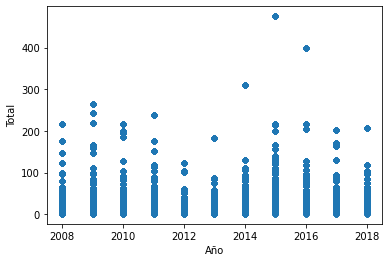

In [15]:
# Graficamos el total de homicidios por año para evaluar la 'tendencia'
final_df.plot(x ='Año', y='Total', kind = 'scatter')
plt.show()

## **4. Modelo de predicción de cantidad de homicidos**
El objetivo del modelo es determinar si a través de un año y municipio es posible encontrar un patrón o relación histórica con las cantidad (total) de homicidios en el mismo.

In [16]:
#Definimos las variables x e y, dado un año y municipio se busca predecir cuandos homicidios habran
x = final_df[['Año', 'Municipio_encode']]
y = final_df[['Total']]

In [17]:
#Separamos el data set en 80% train y 20% test
from sklearn.model_selection import  train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

#### **Epsilon-Support Vector Regression con kernel Radial basis function (rbf)**

In [18]:
#Aplicamos el algoritmo de Epsilon-Support Vector Regression
from sklearn.svm import SVR

svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svr_rbf.fit(x_train,y_train.values.ravel())

y_pred_rbf = svr_rbf.predict(x_test)

Se obtiene un coeficiente de correlación ($R^2$) de 92.26% al entrenar el modelo y de un 91.92% al predecir los valores de $y$ comparado con los valores reales del dataset.

In [19]:
#Obtenemos el coeficiente de determinacion para evaluar cuanto se ajusta el modelo
from sklearn.metrics import r2_score

r2_score_train = svr_rbf.score(x_train,y_train)
print('R^2 train: '+str(r2_score_train))

r2_score_test = r2_score(y_test,y_pred_rbf)
print('R^2 test: '+str(r2_score_test))

R^2 train: 0.9225554687024862
R^2 test: 0.9192028543564328


### **Guardar el modelo**

In [20]:
#Guardamos el modelo para que este persista
import joblib

filename = 'modelo_rbf.pkl'
joblib.dump(svr_rbf, filename)

['modelo_rbf.pkl']

In [21]:
#Cargamos el modelo guardado y verificamos su correcto funcionamiento
loaded_model = joblib.load(filename)
y_load = loaded_model.predict(x_test)

print(r2_score(y_test, y_load))

0.9192028543564328
